# Loading datasets from local computer

In [314]:
# !pip install numpy pandas matplotlib ipywidgets

import os
from ipywidgets import interact
import seaborn as sb
import scipy.stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression

In [5]:
owid_covid_data = pd.read_csv(r"/home/goncalo/Documents/cover/Illuminatti/hackathon/datasets/owid-covid-data.csv", index_col='location')

OxCGRT_covid_data = pd.read_csv(r"/home/goncalo/Documents/cover/Illuminatti/hackathon/datasets/OxCGRT_latest.csv", index_col='CountryName')

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
owid_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83862 entries, Afghanistan to Zimbabwe
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               83862 non-null  object 
 1   continent                              79805 non-null  object 
 2   date                                   83862 non-null  object 
 3   total_cases                            81878 non-null  float64
 4   new_cases                              81876 non-null  float64
 5   new_cases_smoothed                     80875 non-null  float64
 6   total_deaths                           72262 non-null  float64
 7   new_deaths                             72420 non-null  float64
 8   new_deaths_smoothed                    80875 non-null  float64
 9   total_cases_per_million                81435 non-null  float64
 10  new_cases_per_million                  81433 non-null  float64

In [7]:
df = owid_covid_data.sort_values('date', ascending=True)
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
owid_covid_data.tail(20)

,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,,,,,,,,,,,,,,,
Zimbabwe,ZWE,Africa,2021-04-05,36934.0,11.0,13.571,1525.0,0.0,0.714,2484.975,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
Zimbabwe,ZWE,Africa,2021-04-06,36966.0,32.0,18.143,1531.0,6.0,1.571,2487.128,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
Zimbabwe,ZWE,Africa,2021-04-07,36984.0,18.0,14.571,1531.0,0.0,1.143,2488.339,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
Zimbabwe,ZWE,Africa,2021-04-08,37052.0,68.0,22.286,1532.0,1.0,1.286,2492.914,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
Zimbabwe,ZWE,Africa,2021-04-09,37147.0,95.0,34.857,1535.0,3.0,1.571,2499.306,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
Zimbabwe,ZWE,Africa,2021-04-10,37273.0,126.0,51.714,1538.0,3.0,2.000,2507.783,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
Zimbabwe,ZWE,Africa,2021-04-11,37288.0,15.0,52.143,1538.0,0.0,1.857,2508.793,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
Zimbabwe,ZWE,Africa,2021-04-12,37307.0,19.0,53.286,1542.0,4.0,2.429,2510.071,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
Zimbabwe,ZWE,Africa,2021-04-13,37330.0,23.0,52.000,1543.0,1.0,1.714,2511.618,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [265]:
df_filtered = df.loc['Netherlands']
# df_filtered.drop_duplicates(keep='first',inplace=True)

df_filtered.head()

,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,,,,,,,,,,,,,,,
Netherlands,NLD,Europe,2020-02-27,1.0,1.0,NaN,NaN,NaN,NaN,0.058,...,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,82.28,0.944
Netherlands,NLD,Europe,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.058,...,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,82.28,0.944
Netherlands,NLD,Europe,2020-02-29,6.0,5.0,NaN,NaN,NaN,NaN,0.350,...,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,82.28,0.944
Netherlands,NLD,Europe,2020-03-01,10.0,4.0,NaN,NaN,NaN,NaN,0.584,...,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,82.28,0.944
Netherlands,NLD,Europe,2020-03-02,18.0,8.0,NaN,NaN,NaN,NaN,1.050,...,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,82.28,0.944


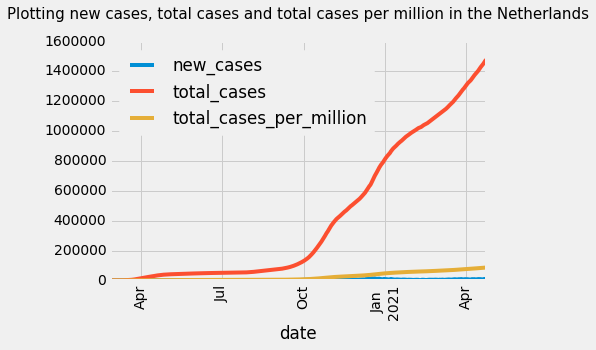

In [266]:
with plt.style.context('fivethirtyeight'):
    df_filtered = df.loc['Netherlands']
    df_filtered.plot(x="date", y=["new_cases", "total_cases", "total_cases_per_million"])
    plt.xticks(rotation=90)
    plt.title('Plotting new cases, total cases and total cases per million in the Netherlands\n', size=15);
    plt.show()

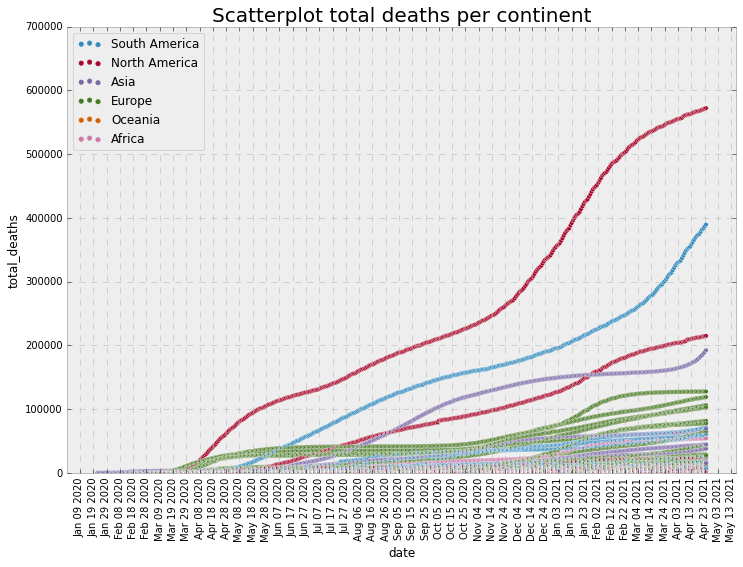

In [267]:
%matplotlib inline

plt.style.use('bmh')

fig = plt.subplots(figsize=(12, 8))

ax = sb.scatterplot(data=df, x='date', y='total_deaths', hue='continent')
ax.set_title('Scatterplot total deaths per continent', size=20);
ax.set_ylim(ymin=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

plt.legend(loc='upper left')
plt.setp(ax.get_xticklabels(), rotation=90)
print() # removes weird array output filled with 'None's

In [381]:
%matplotlib inline
pd.set_option('display.max_columns', None)

pop = pd.read_csv(r"/home/goncalo/Documents/cover/Illuminatti/hackathon/datasets/owid-covid-data.csv", index_col='continent')
pop = pop.loc['Europe']

pop.tail()

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Europe,VAT,Vatican,2021-04-20,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
Europe,VAT,Vatican,2021-04-21,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
Europe,VAT,Vatican,2021-04-22,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
Europe,VAT,Vatican,2021-04-23,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
Europe,VAT,Vatican,2021-04-24,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN


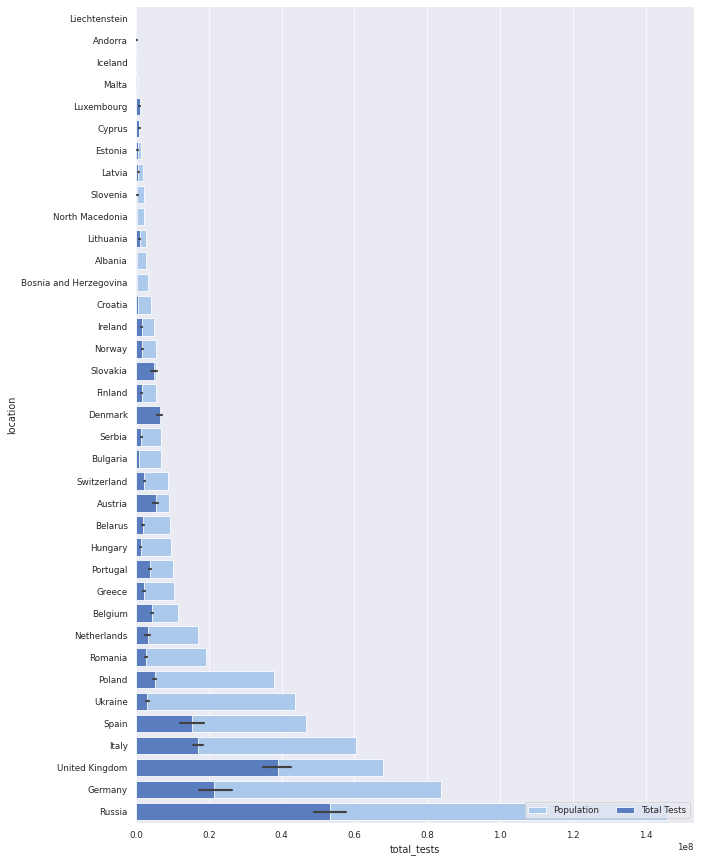

In [342]:
%matplotlib inline

pop = pop.sort_values('population', ascending=True)

# Remove NAN values in the dataframe
pop = pop[pop['population'].notna()]
pop = pop[pop['total_tests'].notna()]

sb.set_context('paper')

f, ax = plt.subplots(figsize = (10,15))
                     
sb.set_color_codes('pastel')

sb.barplot(x = 'population', y = 'location', data = pop,
            label = 'Population', color = 'b', edgecolor = 'w')

sb.set_color_codes('muted')

sb.barplot(x = 'total_tests', y = 'location', data = pop,
            label = 'Total Tests', color = 'b', edgecolor = 'w')

ax.legend(ncol = 2, loc = 'lower right')
sb.despine(left = True, bottom = True)
plt.show()

As expected, countries with more population have tested more. What is interesting is that Germany tested roughly the same amount of people as Spain even though its population is double the amount of Spains. The same interesting phenomena is observed for Russia - having tested the same amount roughly as the United Kingdom but having more than twice their population.

As can be seen above, there is no particular correlation between ICU entries and available hospital beds.

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


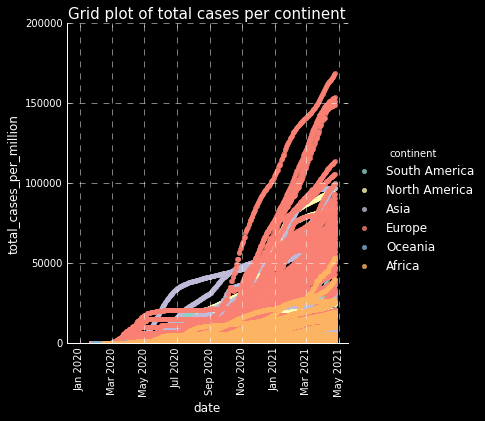

In [268]:
df = owid_covid_data.sort_values('date', ascending=True)

# Firstly need to change date time from string to datetime type
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

with plt.style.context('dark_background'):
    g = sb.lmplot('date', 'total_cases_per_million', data=df, hue='continent', fit_reg=False)
    ax = plt.gca()
    ax.set_title('Grid plot of total cases per continent', size=15);
    g.set(ylim=(0,None))
    g.set_xticklabels(rotation=90) 

# Comparing total deaths and total cases per million
We can see that even though the continent with the highest number of cases per million was Europe, America suffered many more deaths in total, particularly in the north.

<IPython.core.display.Javascript object>


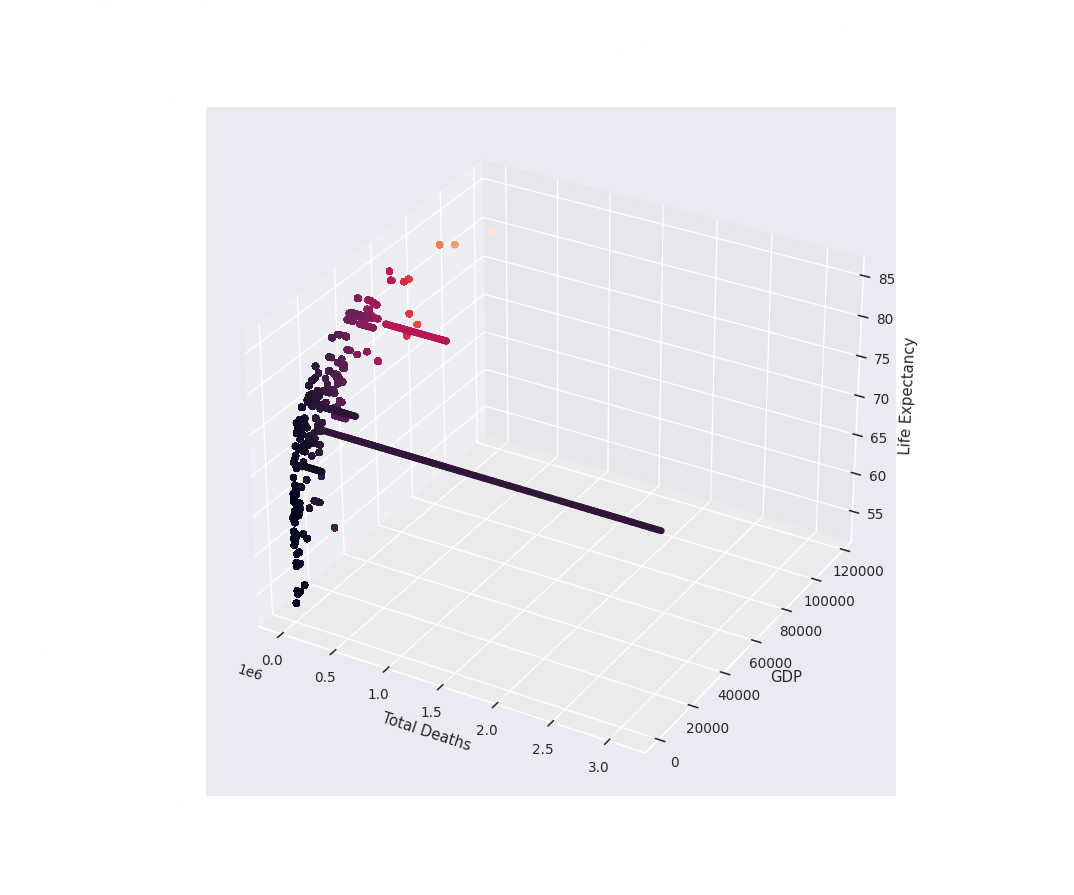

In [41]:
%matplotlib notebook

# 3d Visualization
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sb

sb.set(style = "darkgrid")

fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(111, projection = '3d')

x = df['total_deaths']
y = df['gdp_per_capita']
z = df['life_expectancy']

ax.set_xlabel("Total Deaths")
ax.set_ylabel("GDP")
ax.set_zlabel("Life Expectancy")

ax.scatter(x, y, z, c=y)

plt.show()

# Using the 3D graph to hypothesize about correlation
It can be seen that lower GDPs and life expectancies are correlated as well as higher total number of deaths. So poorer countries with already low life expectancies suffered the larger number of total deaths.

In [75]:
owid_covid_data = pd.read_csv(r"/home/goncalo/Documents/cover/Illuminatti/hackathon/datasets/owid-covid-data.csv", index_col='continent')

df_europe = df.loc['Europe']
df_europe_date = df_europe.sort_values('date', ascending=True)
df_europe_date['date'] = pd.to_datetime(df_europe_date['date'], format = '%Y-%m-%d')
df_europe = df_europe_date

df_europe.tail()

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
continent,,,,,,,,,,,,,,,,,,,,,
Europe,UKR,Ukraine,2021-04-24,2071142.0,12841.0,11711.714,43884.0,401.0,372.286,47357.969,...,7894.393,0.1,539.849,7.11,13.5,47.4,NaN,8.800,72.06,0.779
Europe,SRB,Serbia,2021-04-24,677972.0,2068.0,2524.714,6196.0,32.0,34.571,99634.424,...,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.00,0.806
Europe,MKD,North Macedonia,2021-04-24,150274.0,564.0,505.857,4650.0,22.0,33.000,72129.904,...,13111.214,5.0,322.688,10.08,NaN,NaN,NaN,4.280,75.80,0.774
Europe,CHE,Switzerland,2021-04-24,646509.0,0.0,2015.714,10594.0,28.0,12.714,74701.044,...,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.530,83.78,0.955
Europe,ROU,Romania,2021-04-24,1044722.0,2201.0,2526.143,27267.0,154.0,170.714,54306.023,...,23313.199,5.7,370.946,9.74,22.9,37.1,NaN,6.892,76.05,0.828


In [ ]:
# Create a pair plot colored by continent with a density plot of the # diagonal and format the scatter plots.
sb.pairplot(df_europe, hue = 'location', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/hom

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/goncalo/anaconda3/e

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


In [1]:
%matplotlib inline

grid = sb.FacetGrid(df_europe, col = "location", hue = "total_deaths", col_wrap=7)
grid.map(sb.scatterplot, "date", "total_deaths")
grid.xaxis.set_major_locator(ticker.MultipleLocator(10))

grid.add_legend()
plt.show()

NameError: name 'sb' is not defined

In [ ]:
fig = plt.subplots(figsize=(16, 14))

ax = sb.scatterplot(data = df_europe, x = "location", y = "gdp_per_capita", hue = "total_cases_per_million", size = "total_cases_per_million",
                   sizes=(100, 100000), legend='full')
ax.set_title('Scatterplot GDP per , where datapoint size represents total number of cases', size=20);
ax.set_ylim(ymin=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.legend([],[], frameon=False)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

# Estimating the correlation between two variables with a contingency table and a chi-squared test

Estimating correlation between total_deaths and cardiovasc death rate, diabetes prevalence, female and male smokers.

In [2]:
# Select latest available data
df_europe = df_europe.loc[df_europe['date'] == '2021-04-24']

countries = df_europe['location']
total_deaths = df_europe['total_deaths']

# diabetes = df_europe['diabetes_prevalence']
# cvd_rate = df_europe['cardiovasc_death_rate']

n_smokers = df_europe['female_smokers'] + df_europe['male_smokers']

NameError: name 'df_europe' is not defined

In [168]:
df_bis_smoking = pd.DataFrame({'country':countries,
                       'total_deaths': total_deaths,
                       'n_smokers': n_smokers}).dropna()

df_bis_smoking = df_bis_smoking.reset_index(drop=True)

df_bis_smoking.set_index(["country"], inplace = True,
                    append = True, drop = True)

df_bis_smoking.head(39)

,,total_deaths,n_smokers
,country,,
0,Hungary,26420.0,61.6
1,Spain,77591.0,58.8
2,France,102872.0,65.7
3,Luxembourg,790.0,46.9
4,Iceland,29.0,29.5
5,Greece,9950.0,87.3
6,Norway,736.0,40.3
7,Bulgaria,15859.0,74.5
8,Belarus,2483.0,56.6


# Pearson's correlation coefficient


In [170]:
df_bis_smoking.corr()

,total_deaths,n_smokers
total_deaths,1.000000,0.018405
n_smokers,0.018405,1.000000


# Contingency table, with the frequencies of all four possibilities

In [171]:
df_bis_smoking['total_deaths_binarized'] = (df_bis_smoking['total_deaths'] > df_bis_smoking['total_deaths'].median())
df_bis_smoking['n_smokers_binarized'] = (df_bis_smoking['n_smokers'] > df_bis_smoking['n_smokers'].median())

pd.crosstab(df_bis_smoking['total_deaths_binarized'], df_bis_smoking['n_smokers_binarized'])

n_smokers_binarized,False,True
total_deaths_binarized,,
False,11,9
True,9,11


In [177]:
# Example of funtion for displaying tables neatly
from IPython.display import display_html
from itertools import chain,cycle

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
    
    
tab1 = pd.crosstab(df_bis['total_deaths_binarized'], df_bis['n_smokers_binarized'])

display_side_by_side(tab1, titles=['deaths / n smokers'])


n_smokers_binarized,False,True
total_deaths_binarized,,
False,11,9
True,9,11


# To determine if there is a statistically significant correlation between the variables -> chi-squared test

In [178]:
from IPython.display import display_html

this = pd.crosstab(df_bis_smoking['total_deaths_binarized'], df_bis_smoking['n_smokers_binarized'])
st.chi2_contingency(this)

(0.1,
 0.7518296340458492,
 1,
 array([[10., 10.],
        [10., 10.]]))

# Conclusion
The second value of the Chi-squared test is the p-value which indicates the likelihood of the null. Since it's much higher than 0.05 we can't reject the null - it isn't that there isn't a significant correlation between the proportion of deaths and smoking, but rather that the data doesn't show that there is - as indicated by the tests.

# Linear Regression
Modelling the relationship between a dependent variable and one or more independent variables.

In [180]:
df_europe = df_europe.loc[df_europe['date'] == '2021-04-24']

countries = df_europe['location']
total_deaths = df_europe['total_deaths']
diabetes = df_europe['diabetes_prevalence']
cvd_rate = df_europe['cardiovasc_death_rate']
n_smokers = df_europe['female_smokers'] + df_europe['male_smokers']

df_bis = pd.DataFrame({'country':countries,
                       'total_deaths': total_deaths,
                       'diabetes_prevalence': diabetes,
                       'cvd_rate': cvd_rate,
                       'n_smokers': n_smokers}).dropna()

df_bis = df_bis.reset_index(drop=True)

df_bis.set_index(["country"], inplace = True,
                    append = True, drop = True)

df_bis.head(39)

,,total_deaths,diabetes_prevalence,cvd_rate,n_smokers
,country,,,,
0,Hungary,26420.0,7.55,278.296,61.6
1,Spain,77591.0,7.17,99.403,58.8
2,France,102872.0,4.77,86.060,65.7
3,Luxembourg,790.0,4.42,128.275,46.9
4,Iceland,29.0,5.31,117.992,29.5
5,Greece,9950.0,4.55,175.695,87.3
6,Norway,736.0,5.31,114.316,40.3
7,Bulgaria,15859.0,5.81,424.688,74.5
8,Belarus,2483.0,5.18,443.129,56.6


In [182]:
df_bis.describe()

# We can see below a short summary of the data, like the mean or the max value for each metric.

,total_deaths,diabetes_prevalence,cvd_rate,n_smokers
count,40.000000,40.000000,40.000000,40.000000
mean,24795.475000,6.490500,227.846200,58.995000
std,36223.035716,2.014364,127.184188,14.285405
min,29.000000,3.280000,86.060000,29.500000
25%,2304.250000,4.880000,121.100750,48.425000
50%,9076.500000,5.860000,162.425000,59.050000
75%,26631.750000,7.655000,332.973500,67.300000
max,127670.000000,10.080000,539.849000,91.900000


## Checking normality of the data using a QQ plot

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


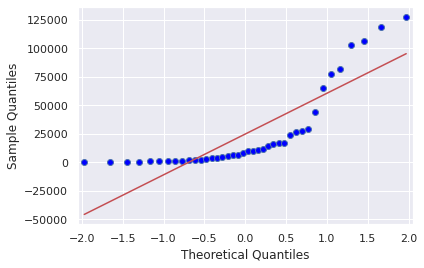

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


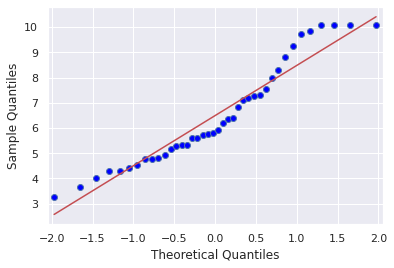

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


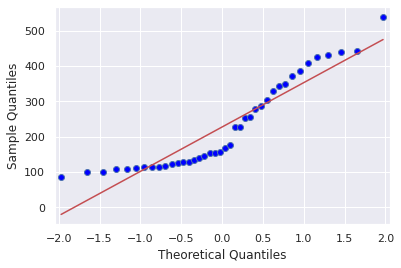

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


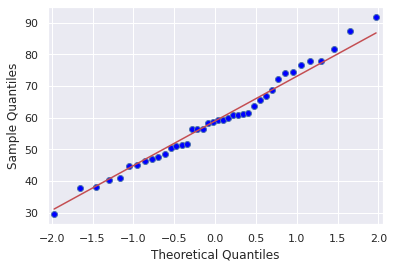

The data can be considered normally distributed - albeit the first plot (total deaths) runs a bit from the line.


In [191]:
'''
Verify normal distribution with, for example, a q-q plot, which
compares our data with a Gaussian distribution (or normal distribution)
'''
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(df_bis['total_deaths'], line='s')
pyplot.show()

qqplot(df_bis['diabetes_prevalence'], line='s')
pyplot.show()

qqplot(df_bis['cvd_rate'], line='s')
pyplot.show()

qqplot(df_bis['n_smokers'], line='s')
pyplot.show()

print('The data can be considered normally distributed - albeit the first plot (total deaths) runs a bit from the line.')

### Linear regression using the diabetes metric

In [285]:
x = df_bis.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
y = df_bis.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# define model
linear_regression = LinearRegression()

# fitting the model
linear_regression.fit(x_train,y_train)

print(linear_regression.intercept_)
print(linear_regression.coef_)

# predict with the data
y_pred = linear_regression.predict(x)
y_pred

[6.63751823]
[[-7.27522433e-06]]


array([[6.4453068 ],
       [6.0730263 ],
       [5.88910135],
       [6.6317708 ],
       [6.63730725],
       [6.56512975],
       [6.63216367],
       [6.52214045],
       [6.61945385],
       [6.62223298],
       [6.16301355],
       [6.42711874],
       [6.6202614 ],
       [6.6292463 ],
       [6.60207334],
       [6.6366161 ],
       [6.62687458],
       [6.60957409],
       [6.56425672],
       [6.61951205],
       [6.59598397],
       [6.5141377 ],
       [6.57783957],
       [6.60694046],
       [6.51188238],
       [6.4629856 ],
       [6.63535021],
       [6.63452084],
       [6.55415871],
       [5.70869034],
       [6.58793758],
       [6.53622528],
       [5.86555873],
       [5.77161376],
       [6.04378717],
       [6.6309487 ],
       [6.31825229],
       [6.59244094],
       [6.5604445 ],
       [6.43914469]])

In [286]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

ValueError: Found input variables with inconsistent numbers of samples: [8, 40]

In [293]:
y_pred = linear_regression.predict(x_test)

print('Actual:')
print(y_test)
print()
print('Predicted:')
print(y_pred)

Actual:
[[10.08]
 [ 5.72]
 [ 4.29]
 [ 5.31]
 [ 5.91]
 [ 7.97]
 [ 7.29]
 [ 6.82]]

Predicted:
[[6.57783957]
 [6.59598397]
 [6.4629856 ]
 [6.63730725]
 [6.16301355]
 [6.6366161 ]
 [6.55415871]
 [6.42711874]]


In [3]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

NameError: name 'plt' is not defined

## Multivariable linear regression

In [295]:
from sklearn.model_selection import train_test_split

y = df_bis['total_deaths']
x = df_bis[['diabetes_prevalence', 'cvd_rate', 'n_smokers']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# define model
linear_regression = LinearRegression()

# fitting the model
linear_regression.fit(x_train,y_train)

print(linear_regression.intercept_)
print(linear_regression.coef_)

# predict with the data
y_pred = linear_regression.predict(x)
print('Actual:')
print(y_test)
print()
print('Predicted:')
print(y_pred[0:8])

32425.76335306103
[-2335.54720323   -48.09270162   339.65924108]
Actual:
    country               
22  Bosnia and Herzegovina     8203.0
20  Moldova                    5709.0
25  Belgium                   23990.0
4   Iceland                      29.0
10  Poland                    65222.0
15  Andorra                     124.0
28  Slovakia                  11458.0
11  Czechia                   28920.0
Name: total_deaths, dtype: float64

Predicted:
[22331.38472981 30871.29446251 39461.95743141 31863.57182144
 24369.4012665  43001.62811395 28214.50984131 23736.45429816]


ValueError: Found input variables with inconsistent numbers of samples: [8, 40]

ValueError: x and y must be the same size

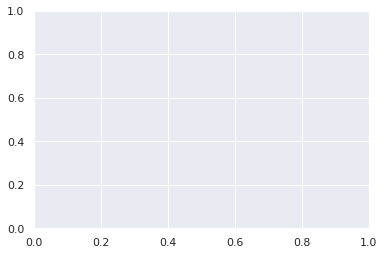

In [6]:
OxCGRT_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135161 entries, Aruba to Zimbabwe
Data columns (total 50 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   CountryCode                            135161 non-null  object 
 1   RegionName                             45695 non-null   object 
 2   RegionCode                             45695 non-null   object 
 3   Jurisdiction                           135161 non-null  object 
 4   Date                                   135161 non-null  int64  
 5   C1_School closing                      131038 non-null  float64
 6   C1_Flag                                104165 non-null  float64
 7   C2_Workplace closing                   130851 non-null  float64
 8   C2_Flag                                97175 non-null   float64
 9   C3_Cancel public events                130910 non-null  float64
 10  C3_Flag                                104274 non-null 

In [5]:
OxCGRT_covid_data.tail(20)

,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
CountryName,,,,,,,,,,,,,,,,,,,,,
Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210406,1.0,1.0,2.0,1.0,2.0,...,57.41,57.41,70.24,70.24,48.23,48.23,55.12,55.12,0.0,0.0
Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210407,1.0,1.0,2.0,1.0,2.0,...,57.41,57.41,70.24,70.24,48.23,48.23,55.12,55.12,0.0,0.0
Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210408,1.0,1.0,2.0,1.0,2.0,...,57.41,57.41,70.24,70.24,48.23,48.23,55.12,55.12,0.0,0.0
Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210409,1.0,1.0,2.0,1.0,2.0,...,57.41,57.41,70.24,70.24,48.23,48.23,55.12,55.12,0.0,0.0
Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210410,1.0,1.0,2.0,1.0,2.0,...,57.41,57.41,70.24,70.24,48.23,48.23,55.12,55.12,0.0,0.0
Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210411,1.0,1.0,2.0,1.0,2.0,...,57.41,57.41,70.24,70.24,52.40,52.40,59.88,59.88,0.0,0.0
Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210412,1.0,1.0,2.0,1.0,2.0,...,57.41,57.41,70.24,70.24,52.40,52.40,59.88,59.88,0.0,0.0
Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210413,1.0,1.0,2.0,1.0,2.0,...,57.41,57.41,70.24,70.24,52.40,52.40,59.88,59.88,0.0,0.0
Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210414,1.0,1.0,2.0,1.0,2.0,...,57.41,57.41,70.24,70.24,52.40,52.40,59.88,59.88,0.0,0.0


# Simple plot

# More interesting notebooks

## Javascript-based visualization that maps data to countries in an interactie image
https://towardsdatascience.com/data-analysis-and-visualization-with-jupyter-notebook-22f6dcd25cc5

## Machine Learning notebooks
https://machine-learning-with-python.readthedocs.io/en/latest/

<IPython.core.display.Javascript object>


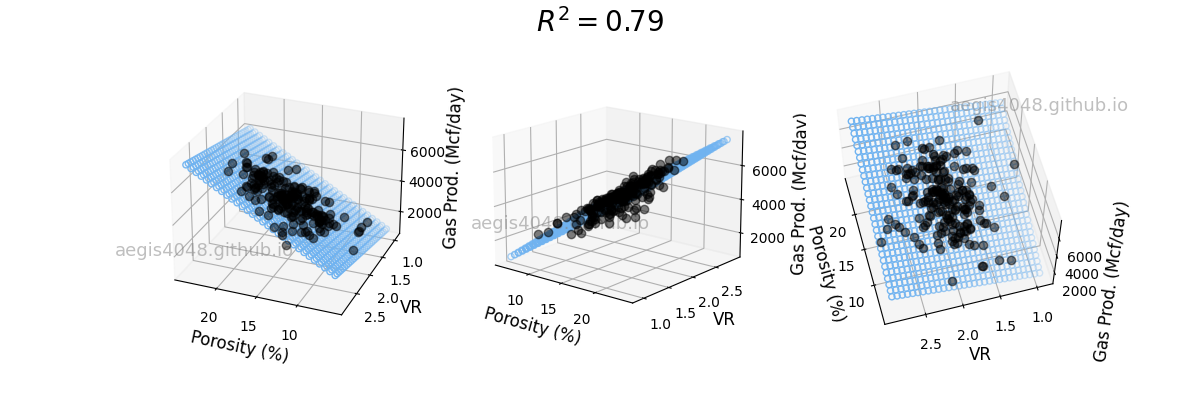

Text(0.5, 0.98, '$R^2 = 0.79$')

In [4]:
# FROM https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
df = pd.read_csv(file)

X = df[['Por', 'VR']].values.reshape(-1,2)
Y = df['Prod']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('VR', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)